 Import necessary libraries

In [12]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

Load Dataset and Save Dataset


In [13]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# Concatenate features and targets along columns (axis=1)
First_Dataset_New = pd.concat([X, y], axis=1)

# Save dataset to Excel file
First_Dataset_New.to_excel("First_Dataset_New.xlsx", index=False)

Check data set

In [14]:
# Define column headings
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

# Read the Excel file into a DataFrame
df = pd.read_excel(r"D:\DESKTOP\CW ML\Adult-Income-Analysis\First_Dataset_New.xlsx", header=None, names=heading, na_values="?")

# Print the shape of the Data
print("Shape of the Data:", df.shape)
df.head()


Shape of the Data: (48843, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


Check Data Types

In [15]:
# Setting all the categorical columns to type category
for col in set(df.columns) - set(df.describe().columns):
    df[col] = df[col].astype('category')

# Print columns and their data types
print("Columns and their types:")
print(df.info())

Columns and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48843 non-null  object
 1   workclass       46044 non-null  object
 2   fnlwgt          48843 non-null  object
 3   education       48843 non-null  object
 4   education-num   48843 non-null  object
 5   marital-status  48843 non-null  object
 6   occupation      46034 non-null  object
 7   relationship    48843 non-null  object
 8   race            48843 non-null  object
 9   sex             48843 non-null  object
 10  capital-gain    48843 non-null  object
 11  capital-loss    48843 non-null  object
 12  hours-per-week  48843 non-null  object
 13  native-country  47986 non-null  object
 14  income          48843 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB
None


Check Missing Data(null and ? values)

In [16]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [17]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48843,46044,48843,48843,48843,48843,46034,48843,48843,48843,48843,48843,48843,47986,48843
unique,75,9,28524,17,17,8,15,7,6,3,124,100,97,42,5
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,1348,33906,21,15784,15784,22379,6172,19716,41762,32650,44807,46560,22803,43832,24720


Missing Values Handling:

1.Count values separately in columns with missing values.
2.Apply a method to handle missing data based on the percentage of missing values in each column.
Missing values columns - 1.native-country:857
                         2.occupation:2809
                         3.workclass: 2799
                    

Native-country values count and Missing Values Handling

In [18]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

In [19]:
#fill missing values as other 
df['native-country'].fillna('Other', inplace = True)
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Other                           857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [20]:
df['native-country'].replace("?", "native-country", inplace=True)

occupation  values count and Missing Values Handling

In [21]:
df['occupation'].replace("?", "other", inplace=True)

In [22]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
occupation              1
Name: count, dtype: int64

In [23]:
#fill missing values as other 
df['occupation'].fillna('Other', inplace = True)
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Other                2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
occupation              1
Name: count, dtype: int64

workclass values count and Missing Values Handling

In [24]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
workclass               1
Name: count, dtype: int64

In [25]:
df['workclass'].replace("?", "other", inplace=True)

In [26]:
#fill missing values as other 
df['workclass'].fillna('Other', inplace = True)
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
workclass               1
Name: count, dtype: int64

After fixing the missing values, check for duplicate values in the dataset

Check education and education-num are same

In [27]:
education_and_eduno= df['education'].unique()
for edu_var in education_and_eduno:
    print("For {}, the Education Number is {}"
          .format(edu_var, df[df['education'] == edu_var]['education-num'].unique()))

For education, the Education Number is ['education-num']
For Bachelors, the Education Number is [13]
For HS-grad, the Education Number is [9]
For 11th, the Education Number is [7]
For Masters, the Education Number is [14]
For 9th, the Education Number is [5]
For Some-college, the Education Number is [10]
For Assoc-acdm, the Education Number is [12]
For Assoc-voc, the Education Number is [11]
For 7th-8th, the Education Number is [4]
For Doctorate, the Education Number is [16]
For Prof-school, the Education Number is [15]
For 5th-6th, the Education Number is [3]
For 10th, the Education Number is [6]
For 1st-4th, the Education Number is [2]
For Preschool, the Education Number is [1]
For 12th, the Education Number is [8]


Both of education and education-num are same so we can drop one column.
so i drop education-num .

In [28]:
df.drop("education-num", axis=1, inplace=True)

Check marital-status and relationship are same

In [29]:
marital_status_and_relationship= df['marital-status'].unique()
for rele_var in marital_status_and_relationship:
    print("For {}, the relationship is {}"
          .format(rele_var, df[df['marital-status'] == rele_var]['relationship'].unique()))

For marital-status, the relationship is ['relationship']
For Never-married, the relationship is ['Not-in-family' 'Own-child' 'Unmarried' 'Other-relative']
For Married-civ-spouse, the relationship is ['Husband' 'Wife' 'Own-child' 'Other-relative' 'Not-in-family']
For Divorced, the relationship is ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative']
For Married-spouse-absent, the relationship is ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative']
For Separated, the relationship is ['Unmarried' 'Own-child' 'Other-relative' 'Not-in-family']
For Married-AF-spouse, the relationship is ['Wife' 'Husband' 'Own-child' 'Other-relative']
For Widowed, the relationship is ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']


After fixing data erroers save data set as new data set

In [30]:
df.to_excel("second_dataset.xlsx", index=False)

check missing values  in new data set

In [31]:
missing_values = df.isnull().sum()
print(missing_values)


age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


check "?" is in there or not

In [32]:
df.isin(["?"]).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Check for duplications in the dataset.

In [33]:
import pandas as pd

df = pd.read_excel("D:\DESKTOP\CW ML\Adult-Income-Analysis\second_dataset.xlsx")
print(f"Is there any duplicates? \n {df.duplicated().any()}")
df = df.drop_duplicates()
print(f"After removing duplicates\nStill,Are there any duplicates? \n {df.duplicated().any()}")

Is there any duplicates? 
 True
After removing duplicates
Still,Are there any duplicates? 
 False


Analys Data

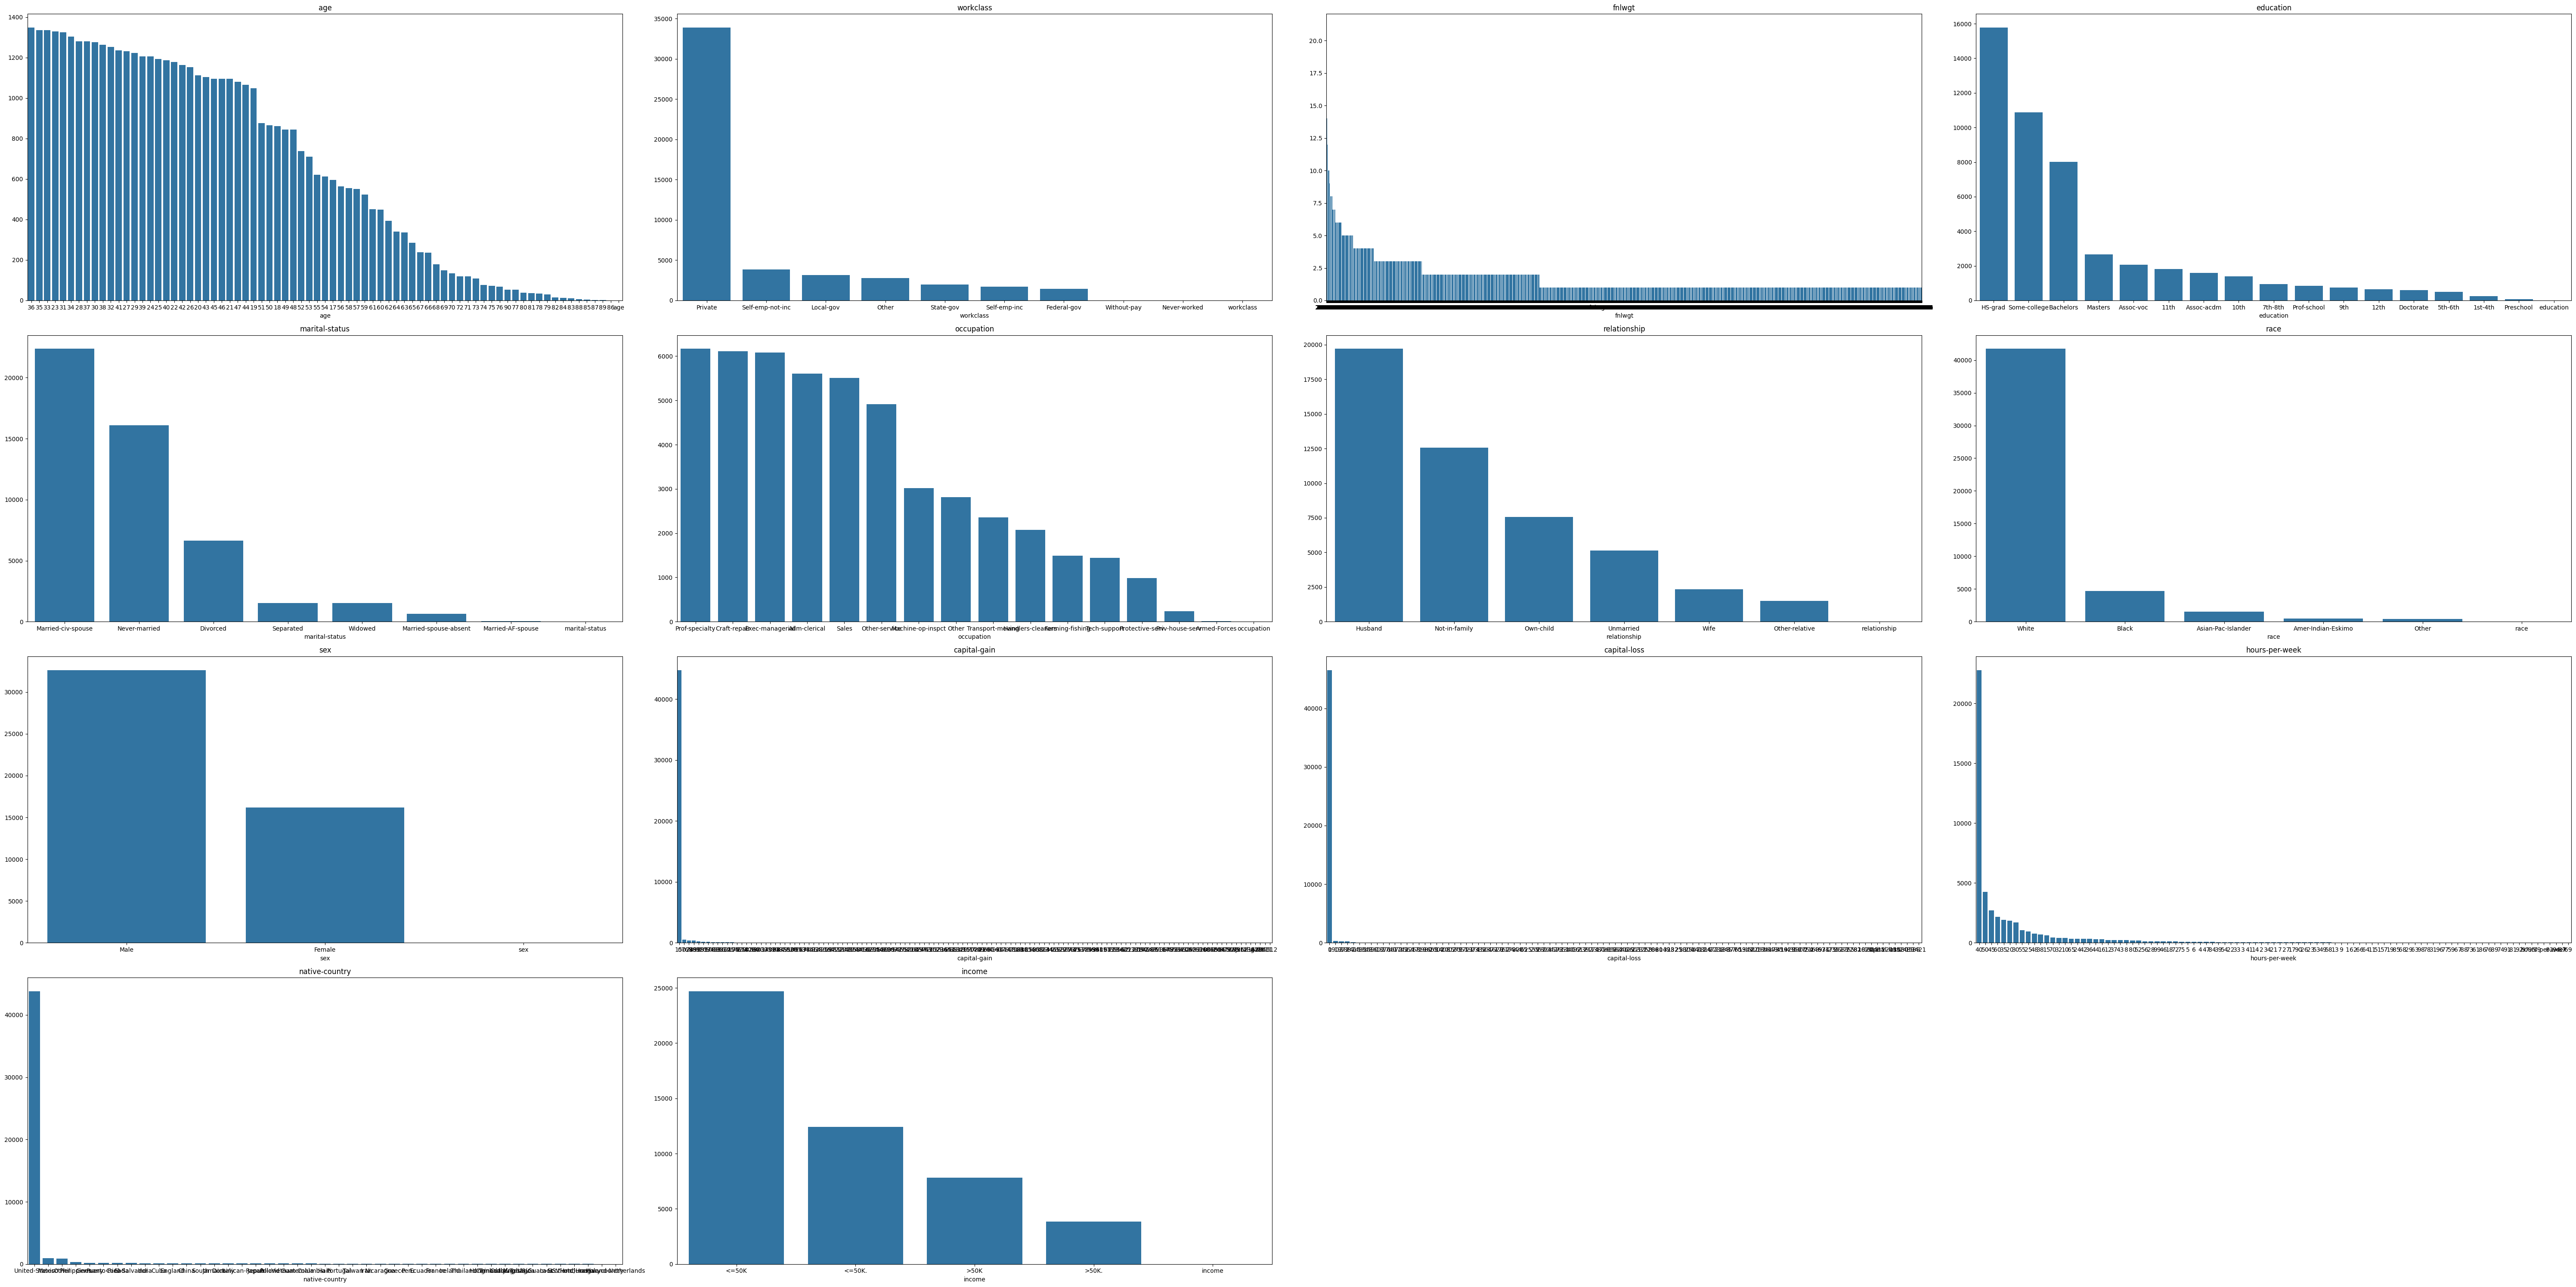

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(60, 30))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(col)

plt.tight_layout()
plt.show()